## **Import dependencies**

In [655]:
! pip install WordCloud --q

In [656]:
# Data Science Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Text Processing Libraries
import string
import re
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# WordCloud for text visualization
from wordcloud import WordCloud

# NLTK for natural language processing
import nltk
from nltk.corpus import stopwords    # For stopwords
from nltk.tokenize import word_tokenize # For tokenization
from nltk.stem import PorterStemmer, WordNetLemmatizer # For stemming and lemmatization

# Downloading NLTK data
nltk.download('stopwords')   # Downloading stopwords data
nltk.download('punkt')       # Downloading tokenizer data
nltk.download('wordnet')     # Downloading WordNet data for lemmatization


[nltk_data] Downloading package stopwords to C:\Users\Santosh
[nltk_data]     Kumar_TSI\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Santosh
[nltk_data]     Kumar_TSI\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Santosh
[nltk_data]     Kumar_TSI\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

## **Load the dataset:**

In [657]:
df= pd.read_csv("C:/Users/Santosh Kumar_TSI/MLOPS-Complete-ML-Pipeline/experiment/spam.csv")
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


## **Remove the columns which are not required**

In [658]:
df=df[["v2","v1"]].rename(columns= {"v2":"text","v1":"target"})

## **Know your data**

In [659]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5572 non-null   object
 1   target  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [660]:
df.isna().sum()

text      0
target    0
dtype: int64

In [661]:
df.duplicated().sum()

403

In [662]:
df.drop_duplicates(keep="first", inplace=True)
df.reset_index(drop=True, inplace=True)


In [663]:
df.duplicated().sum()

0

In [664]:
df.target.describe()

count     5169
unique       2
top        ham
freq      4516
Name: target, dtype: object

In [665]:
df

,text,target
0,"Go until jurong point, crazy.. Available only ...",ham
1,Ok lar... Joking wif u oni...,ham
2,Free entry in 2 a wkly comp to win FA Cup fina...,spam
3,U dun say so early hor... U c already then say...,ham
4,"Nah I don't think he goes to usf, he lives aro...",ham
...,...,...
5164,This is the 2nd time we have tried 2 contact u...,spam
5165,Will Ì_ b going to esplanade fr home?,ham
5166,"Pity, * was in mood for that. So...any other s...",ham
5167,The guy did some bitching but I acted like i'd...,ham


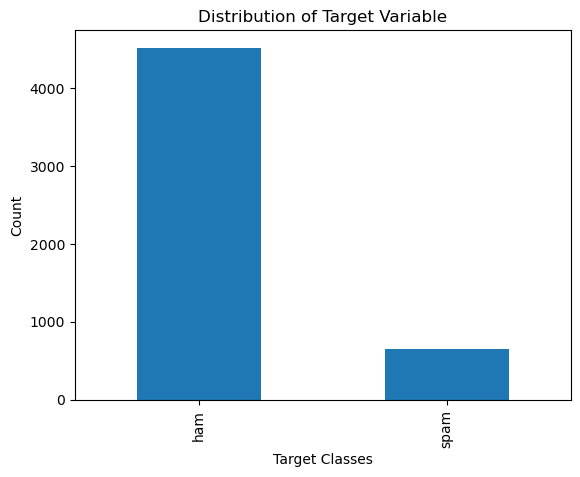

In [666]:
df.target.value_counts().plot(kind='bar')
plt.xlabel("Target Classes")
plt.ylabel("Count")
plt.title("Distribution of Target Variable")
plt.show()

### **observation:**
- Data is highly imbalance and having duplicate values

## **Data Preprocessing:**


























In [677]:
# Define the text preprocessing function with additional features
def text_preprocessing(data, col):
    lemmatizer = WordNetLemmatizer()
    stop_words = set(stopwords.words('english'))

    # Process the text and extract features
    processed_col = data[col].str.lower().str.strip().apply(lambda x: ' '.join([
        lemmatizer.lemmatize(word) 
        for word in word_tokenize(x) 
        if word not in stop_words and word.isalnum()
    ]))
    
    # Extract features
    text_length = processed_col.str.len()  # Number of characters in the original text
    word_count = processed_col.apply(lambda x: len([word for word in word_tokenize(x) if word.isalpha()]))  # Number of words
    avg_word_length = processed_col.apply(lambda x: sum(len(word) for word in word_tokenize(x) if word.isalpha()) / len([word for word in word_tokenize(x) if word.isalpha()]) if len([word for word in word_tokenize(x) if word.isalpha()]) > 0 else 0)  # Average word length
    
    # Add the new features to the dataframe
    processed_data=pd.DataFrame()
    processed_data['text'] = processed_col
    processed_data['text_length'] = text_length
    processed_data['word_count'] = word_count
    processed_data['avg_word_length'] = avg_word_length
    
    return processed_data.join(data.iloc[:,-1])

In [678]:
cleaned_df=df.pipe(text_preprocessing, col="text")
cleaned_df.head(5)

,text,text_length,word_count,avg_word_length,target
0,go jurong point crazy available bugis n great ...,82,16,4.187500,ham
1,ok lar joking wif u oni,23,6,3.000000,ham
2,free entry 2 wkly comp win fa cup final tkts 2...,129,20,3.950000,spam
3,u dun say early hor u c already say,35,9,3.000000,ham
4,nah think go usf life around though,35,7,4.142857,ham


In [671]:
df.text[1787]

'You got job in wipro:)you will get every thing in life in 2 or 3 years.'

In [672]:
cleaned_df.text[1787]

'got job wipro get every thing life 2 3 year'

In [673]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5169 entries, 0 to 5168
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   text             5169 non-null   object 
 1   text_length      5169 non-null   int64  
 2   word_count       5169 non-null   int64  
 3   avg_word_length  5169 non-null   float64
dtypes: float64(1), int64(2), object(1)
memory usage: 161.7+ KB


In [674]:
cleaned_df

,text,text_length,word_count,avg_word_length
0,go jurong point crazy available bugis n great ...,82,16,4.187500
1,ok lar joking wif u oni,23,6,3.000000
2,free entry 2 wkly comp win fa cup final tkts 2...,129,20,3.950000
3,u dun say early hor u c already say,35,9,3.000000
4,nah think go usf life around though,35,7,4.142857
...,...,...,...,...
5164,2nd time tried 2 contact u pound prize 2 claim...,89,11,4.454545
5165,b going esplanade fr home,25,5,4.200000
5166,pity mood suggestion,20,3,6.000000
5167,guy bitching acted like interested buying some...,78,13,5.076923


### **Make a pipeline for target column**

In [535]:
# Define the target pipeline
target_pipe = Pipeline(steps=[
    ('encoding', LabelEncoder())  
])
target_pipe

Pipeline(steps=[('encoding', LabelEncoder())])

,index,text,target,processed_text,text_length,word_count,avg_word_length
0,0,go jurong point crazy available bugis n great ...,ham,go jurong point crazy available bugis n great ...,111,20,4.150000
1,1,ok lar joking wif u oni,ham,ok lar joking wif u oni,29,6,3.000000
2,2,free entry 2 wkly comp win fa cup final tkts 2...,spam,free entry 2 wkly comp win fa cup final tkts 2...,155,26,3.423077
3,3,u dun say early hor u c already say,ham,u dun say early hor u c already say,49,11,3.000000
4,4,nah think go usf life around though,ham,nah think go usf life around though,61,13,3.461538
...,...,...,...,...,...,...,...
5164,5567,2nd time tried 2 contact u pound prize 2 claim...,spam,2nd time tried 2 contact u pound prize 2 claim...,161,21,3.809524
5165,5568,b going esplanade fr home,ham,b going esplanade fr home,37,7,3.857143
5166,5569,pity mood suggestion,ham,pity mood suggestion,57,10,4.100000
5167,5570,guy bitching acted like interested buying some...,ham,guy bitching acted like interested buying some...,125,26,3.769231


In [537]:

#xtrain,xtest,ytrain,ytest= train_test_split(x,y,test_size=.2,random_state=42)
#print('The shape of training data is',xtrain.shape)
#print('The shape of testing data is',xtest.shape)